In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder,StandardScaler  
import imblearn
from imblearn.over_sampling import SMOTE
import json
import requests
import ppscore as pps

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

# import machine learning libraries 
import kds
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from poniard import PoniardClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix,classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/leemn/Downloads/marketing_campaign.csv", delimiter="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [4]:
data['ID'].nunique()

2240

In [5]:
data.isnull().sum()/len(data)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

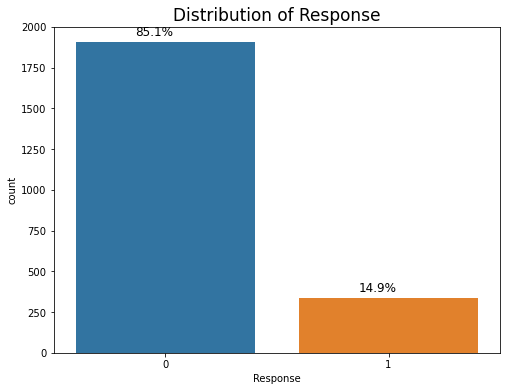

In [7]:
def target(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                      textcoords = 'offset points')

plt.show()

plt.figure(figsize=(8, 6))
plt.title("Distribution of Response",fontsize=17)
plot = sns.countplot(data['Response'])

target(plot,data.Response)

In [8]:
# Predictive power of vaiables
data['Response'] = data['Response'].astype(str)
predictors_df = pps.predictors(data, "Response")
predictors_df.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,AcceptedCmp5,Response,0.260934,classification,True,weighted F1,0.782345,0.839139,DecisionTreeClassifier()
1,AcceptedCmp1,Response,0.228511,classification,True,weighted F1,0.782345,0.832082,DecisionTreeClassifier()
2,MntMeatProducts,Response,0.103573,classification,True,weighted F1,0.782345,0.804888,DecisionTreeClassifier()
3,MntWines,Response,0.091172,classification,True,weighted F1,0.782345,0.802189,DecisionTreeClassifier()
4,Income,Response,0.087884,classification,True,weighted F1,0.780698,0.799971,DecisionTreeClassifier()
5,AcceptedCmp2,Response,0.081966,classification,True,weighted F1,0.782345,0.800186,DecisionTreeClassifier()
6,Dt_Customer,Response,0.042973,classification,True,weighted F1,0.782345,0.791699,DecisionTreeClassifier()
7,AcceptedCmp3,Response,0.034684,classification,True,weighted F1,0.782345,0.789894,DecisionTreeClassifier()
8,MntFruits,Response,0.017008,classification,True,weighted F1,0.782345,0.786047,DecisionTreeClassifier()
9,MntSweetProducts,Response,0.012848,classification,True,weighted F1,0.782345,0.785142,DecisionTreeClassifier()


In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
mindate = data['Dt_Customer'].min()
data['Dt_Customer'] = (data['Dt_Customer']-mindate).dt.days

In [10]:
#Fill the missing value in income column
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [11]:
#Create new column that contains age of each customer
data['Age'] = 2022-data['Year_Birth']

In [12]:
# this will combine both the kids into a single columns kids
data['total_kids'] = data['Kidhome']+data['Teenhome']
data = data.drop(['Kidhome','Teenhome','Year_Birth'],axis=1)

In [13]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != "O"]
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25]
print("we have {} discrete features out of {} total features".format(len(discrete_features),len(data.columns)))

we have 14 discrete features out of 28 total features


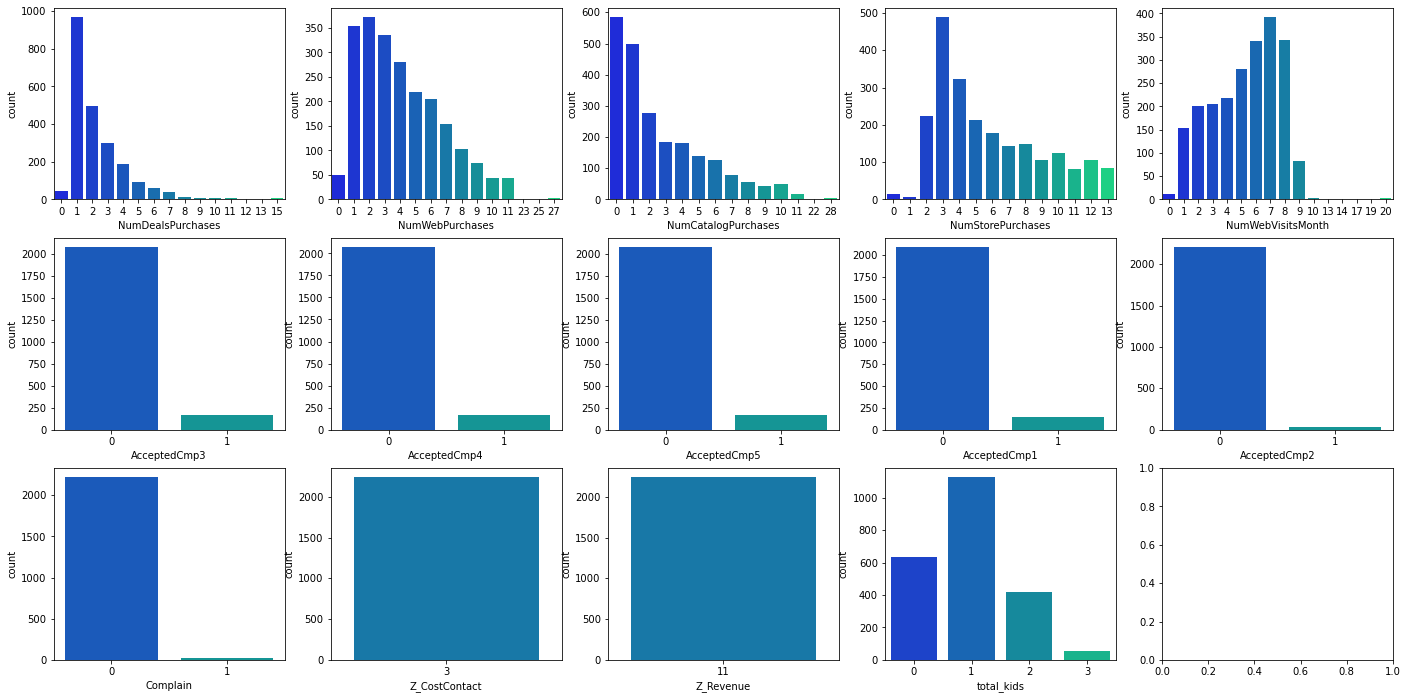

In [14]:
fig,ax = plt.subplots(3,5,figsize=(24,12))
for variable, subplot in zip(discrete_features,ax.flatten()):
    sns.countplot(data[variable],ax=subplot,palette="winter")

In [15]:
data['Response'] = data['Response'].astype(int)

In [16]:
# seperate categorical and continous variables for further visualization
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 13:
        categorical_val.append(column)
    else:
        continous_val.append(column)
        
continous_val, categorical_val

(['ID',
  'Income',
  'Dt_Customer',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'Age'],
 ['Education',
  'Marital_Status',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue',
  'Response',
  'total_kids'])

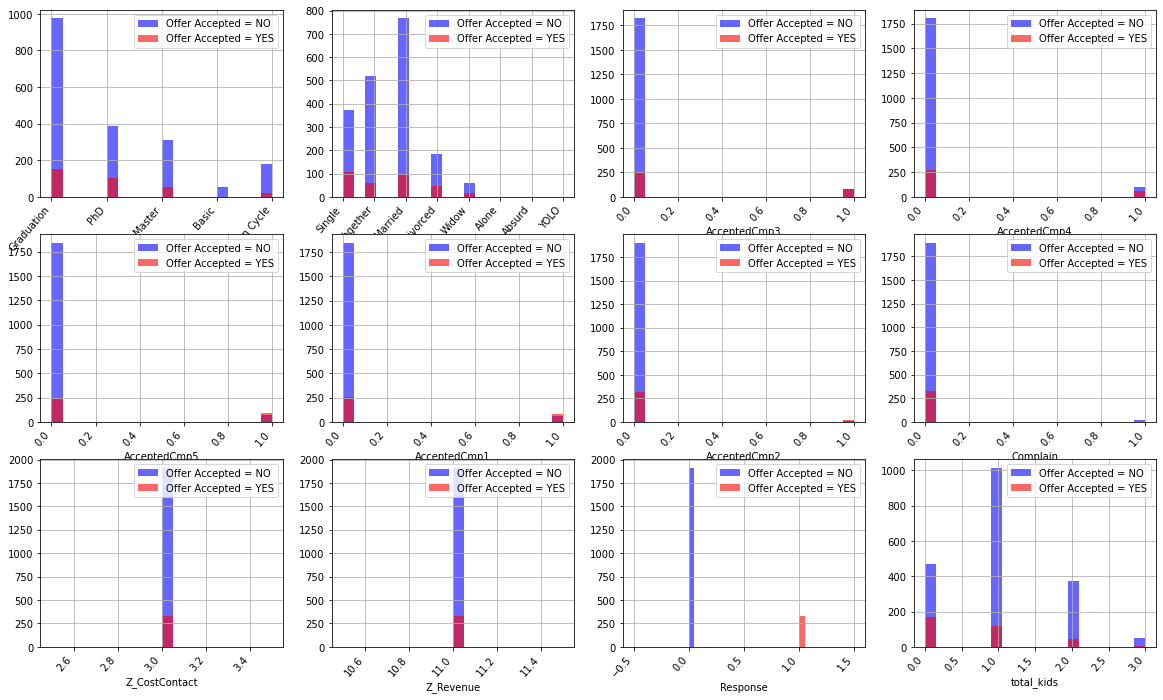

In [17]:
# Target vs. Categorical features

plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(5, 4, i)
    data[data["Response"] == 0][column].hist(bins=20, color='blue', label='Offer Accepted = NO', alpha=0.6)
    data[data["Response"] == 1][column].hist(bins=20, color='red', label='Offer Accepted = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(rotation=49, ha='right',fontsize=10)

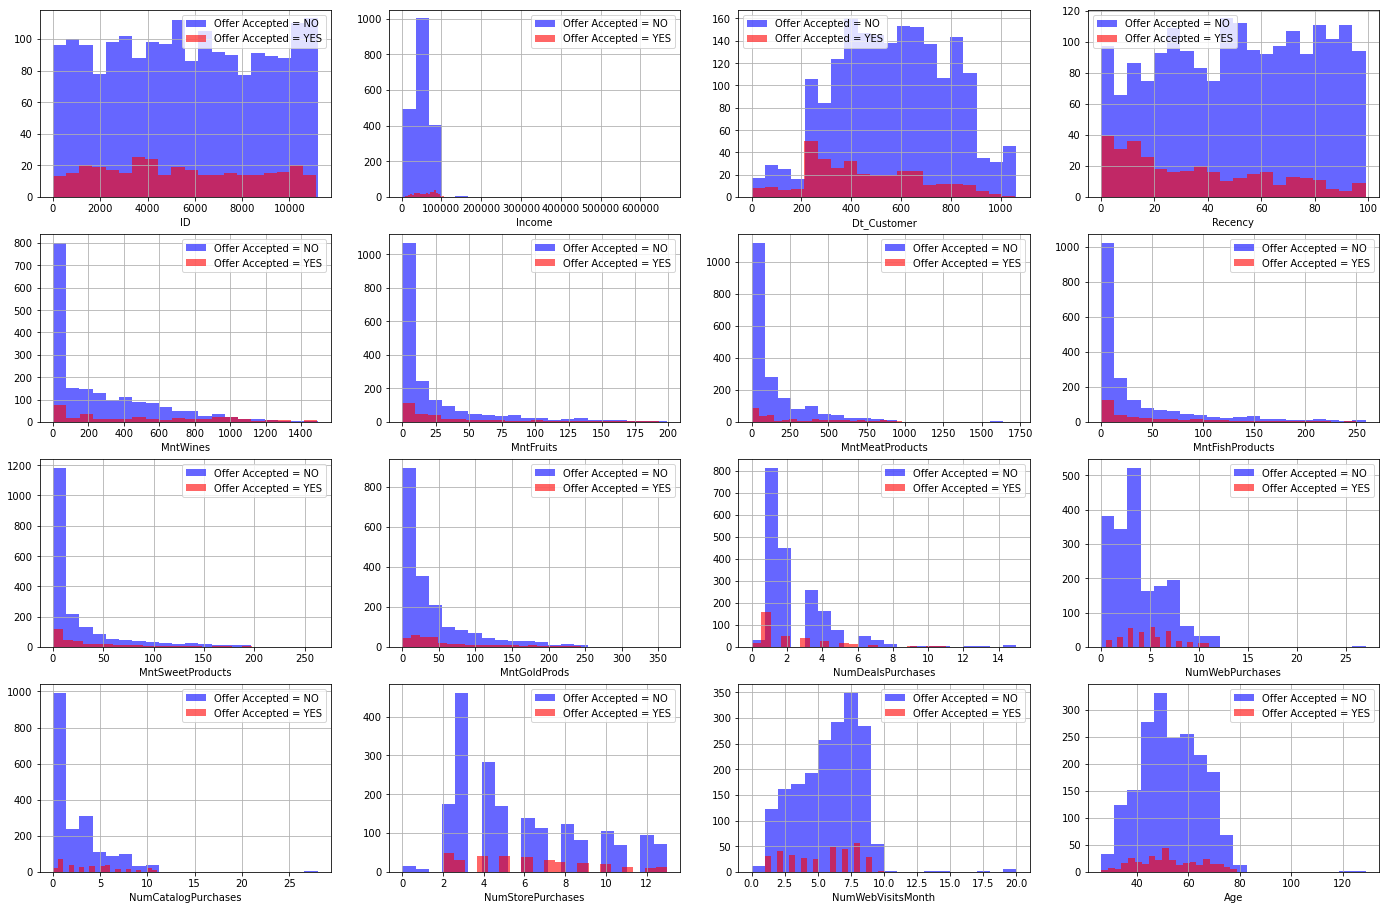

In [19]:
# Target vs. Continous features

plt.figure(figsize=(24, 20))

for i, column in enumerate(continous_val, 1):
    plt.subplot(5, 4, i)
    data[data["Response"] == 0][column].hist(bins=20, color='blue', label='Offer Accepted = NO', alpha=0.6)
    data[data["Response"] == 1][column].hist(bins=20, color='red', label='Offer Accepted = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(fontsize=10)

- Recency seems to have a relation with the feature Response. More customers bought when their Recency was low than when it was high.
- The Complain column does not appear to bring much to the table since less than 1% of the clients complained.
-  Interestingly, customers that subscribed earlier were more susceptible to accept the last offer.
- The last histogram, picturing the income profile of the dataset, also presents interesting information. It looks like the higher income, the higher is the chance of purchasing the gadget.

In [18]:
# let us create a new feature for total_Accepted and total_purchase since as we can see there 
# is not a huge difference between each so we are better off having a single feature rather than a bunch of them
df = data
df['total_accept'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['total_purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3',
         'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
         'Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [19]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response,Age,total_kids,total_accept,total_purchase
0,5524,Graduation,Single,58138.0,92,58,635,88,546,172,88,88,1,65,0,0,25
1,2174,Graduation,Single,46344.0,938,38,11,1,6,2,1,6,0,68,2,0,6
2,4141,Graduation,Together,71613.0,591,26,426,49,127,111,21,42,0,57,0,0,21
3,6182,Graduation,Together,26646.0,998,26,11,4,20,10,3,5,0,38,1,0,8
4,5324,PhD,Married,58293.0,742,94,173,43,118,46,27,15,0,41,1,0,19


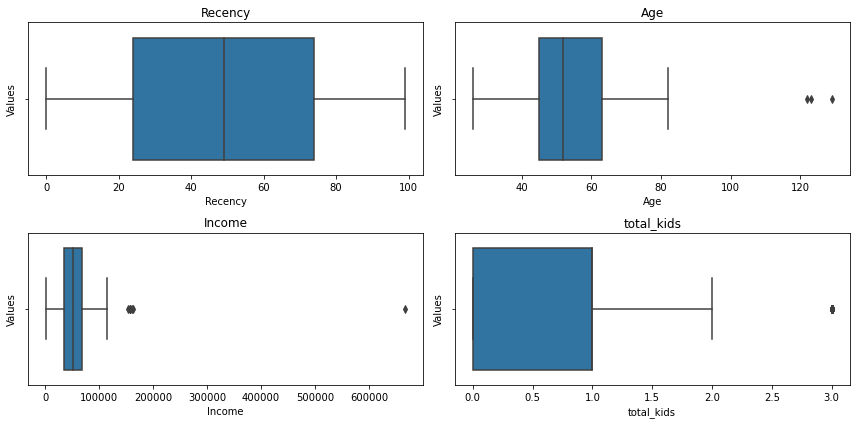

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.boxplot(df.Recency, orient='v', ax=ax[0][0])
ax[0][0].set_title('Recency')
ax[0][0].set_ylabel('Values')
ax[0][0].set_yticklabels([])
sns.boxplot(df.Age, orient='v', ax=ax[0][1])
ax[0][1].set_title('Age')
ax[0][1].set_ylabel('Values')
ax[0][1].set_yticklabels([])
sns.boxplot(df.Income, orient='v', ax=ax[1][0])
ax[1][0].set_title('Income')
ax[1][0].set_ylabel('Values')
ax[1][0].set_yticklabels([])
sns.boxplot(df.total_kids, orient='v', ax=ax[1][1])
ax[1][1].set_title('total_kids')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
plt.tight_layout()
plt.show()

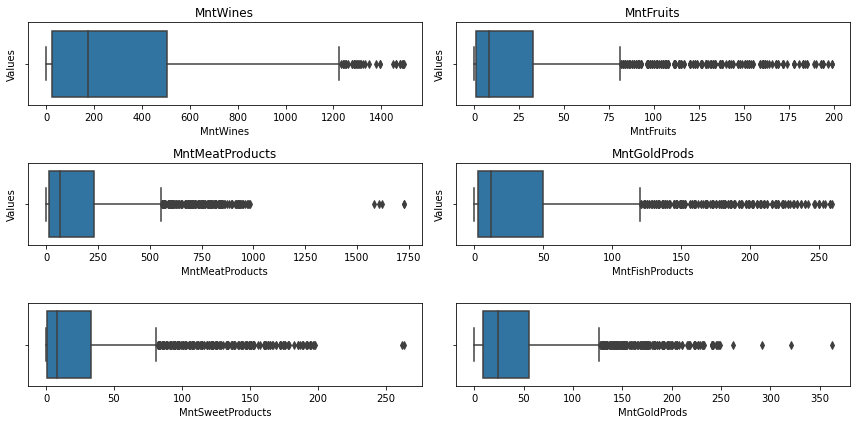

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(12,6))
sns.boxplot(df.MntWines, orient='v', ax=ax[0][0])
ax[0][0].set_title('MntWines')
ax[0][0].set_ylabel('Values')
ax[0][0].set_yticklabels([])
sns.boxplot(df.MntFruits, orient='v', ax=ax[0][1])
ax[0][1].set_title('MntFruits')
ax[0][1].set_ylabel('Values')
ax[0][1].set_yticklabels([])
sns.boxplot(df.MntMeatProducts, orient='v', ax=ax[1][0])
ax[1][0].set_title('MntMeatProducts')
ax[1][0].set_ylabel('Values')
ax[1][0].set_yticklabels([])
sns.boxplot(df.MntFishProducts, orient='v', ax=ax[1][1])
ax[1][1].set_title('MntFishProducts')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
sns.boxplot(df.MntSweetProducts, orient='v', ax=ax[2][0])
ax[1][1].set_title('MntSweetProducts')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
sns.boxplot(df.MntGoldProds, orient='v', ax=ax[2][1])
ax[1][1].set_title('MntGoldProds')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
plt.tight_layout()
plt.show()

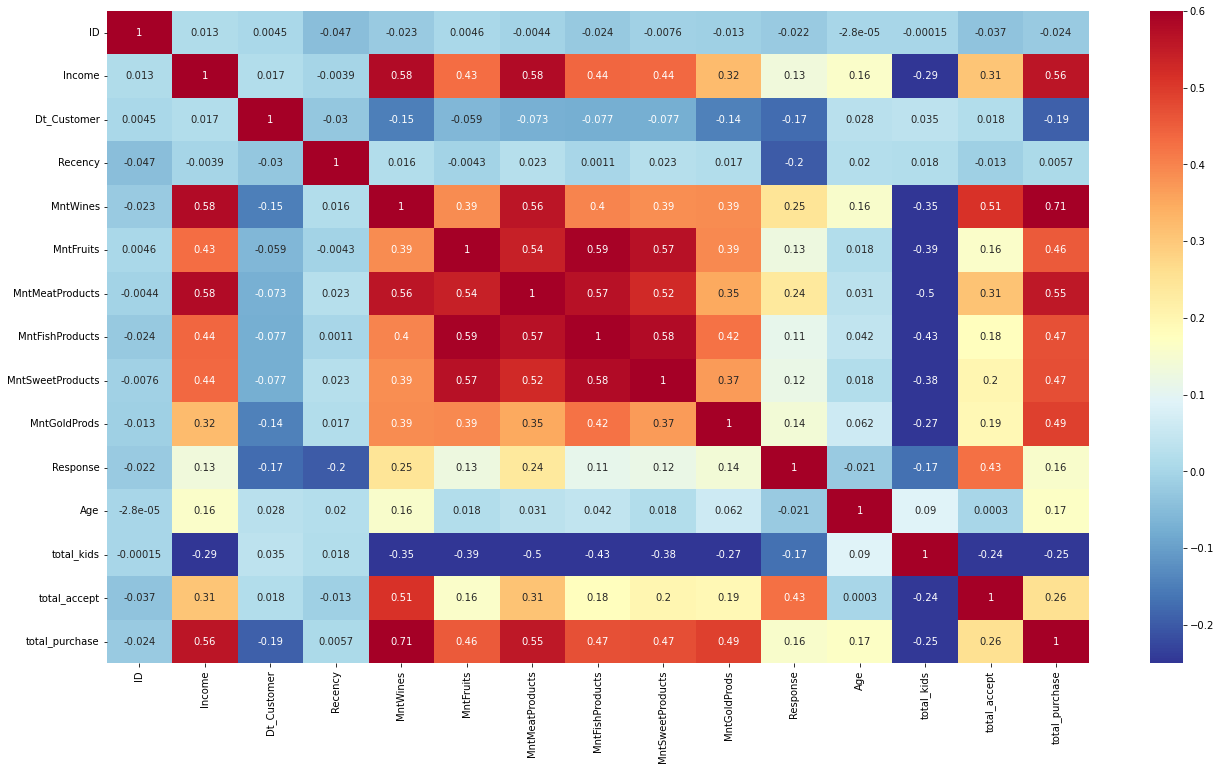

In [24]:
plt.figure(figsize = (22,12))

sns.heatmap(df.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

In [20]:
# Predictive power of vaiables
df['Response'] = df['Response'].astype(str)
predictors_df = pps.predictors(df, "Response")
predictors_df.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,total_accept,Response,0.224052,classification,True,weighted F1,0.782345,0.831111,DecisionTreeClassifier()
1,MntMeatProducts,Response,0.103573,classification,True,weighted F1,0.782345,0.804888,DecisionTreeClassifier()
2,MntWines,Response,0.091172,classification,True,weighted F1,0.782345,0.802189,DecisionTreeClassifier()
3,Income,Response,0.046984,classification,True,weighted F1,0.782345,0.792572,DecisionTreeClassifier()
4,Dt_Customer,Response,0.027120,classification,True,weighted F1,0.782345,0.788248,DecisionTreeClassifier()
5,MntFruits,Response,0.017008,classification,True,weighted F1,0.782345,0.786047,DecisionTreeClassifier()
6,MntSweetProducts,Response,0.012848,classification,True,weighted F1,0.782345,0.785142,DecisionTreeClassifier()
7,total_purchase,Response,0.012678,classification,True,weighted F1,0.782345,0.785105,DecisionTreeClassifier()
8,MntFishProducts,Response,0.009644,classification,True,weighted F1,0.782345,0.784444,DecisionTreeClassifier()
9,MntGoldProds,Response,0.005079,classification,True,weighted F1,0.782345,0.783451,DecisionTreeClassifier()


In [21]:
df['Response'] = df['Response'].astype(int)

In [22]:
df = pd.get_dummies(df, columns=['Marital_Status'])
df = pd.get_dummies(df, columns=['Education'])
df.head()

,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,58138.0,92,58,635,88,546,172,88,88,...,0,1,0,0,0,0,0,1,0,0
1,2174,46344.0,938,38,11,1,6,2,1,6,...,0,1,0,0,0,0,0,1,0,0
2,4141,71613.0,591,26,426,49,127,111,21,42,...,0,0,1,0,0,0,0,1,0,0
3,6182,26646.0,998,26,11,4,20,10,3,5,...,0,0,1,0,0,0,0,1,0,0
4,5324,58293.0,742,94,173,43,118,46,27,15,...,1,0,0,0,0,0,0,0,0,1


In [23]:
train_data = df[(df['Response']==1) | (df['Response']==0)].sample(frac=0.5)
test_data = df[~df.isin(train_data)].dropna(how = 'all')

In [24]:
X = train_data.drop(['Response','ID'],axis = 1) 
y = train_data['Response']   

In [25]:
# apply oversampling since the target feature is imbalanced
oversample = SMOTE(random_state=0)
X_sampled, y_sampled = oversample.fit_resample(X, y)

In [26]:
# Split data - 70% Train and 30% Test
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0,stratify=y_sampled)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1335, 26) (1335,)
(573, 26) (573,)


In [28]:
rf = RandomForestClassifier(n_estimators=145,
                            max_depth=16,
                            criterion='gini',
                            class_weight='balanced',
                            min_samples_split=10,
                            max_leaf_nodes=20,
                            max_features=0.5)
rf.fit(X_train,y_train)
print('Training Score(%):',rf.score(X_train,y_train)*100)
print('Test Score(%):',rf.score(X_test,y_test)*100)

Training Score(%): 93.40823970037452
Test Score(%): 86.03839441535777


In [29]:
xgb = XGBClassifier(n_estimators=44,
                    max_depth=11,
                    learning_rate=0.1,
                    objective = "binary:logistic")
xgb.fit(X_train,y_train)
print('Training Score(%):',xgb.score(X_train,y_train)*100)
print('Test Score(%):',xgb.score(X_test,y_test)*100)

Training Score(%): 100.0
Test Score(%): 91.7975567190227


In [30]:
# Logistic regression - used as a baseline model
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Training Score(%):',lr.score(X_train,y_train)*100)
print('Test Score(%):',lr.score(X_test,y_test)*100)

Training Score(%): 74.23220973782772
Test Score(%): 73.1239092495637


In [31]:
ada = AdaBoostClassifier(n_estimators=145,
                        learning_rate=0.1,
                        algorithm='SAMME.R')
ada.fit(X_train,y_train)
print('Training Score(%):',ada.score(X_train,y_train)*100)
print('Test Score(%):',ada.score(X_test,y_test)*100)

Training Score(%): 89.06367041198502
Test Score(%): 85.16579406631763


In [32]:
hist = HistGradientBoostingClassifier(loss='binary_crossentropy',
                                      learning_rate=0.1,
                                      max_depth=4,
                                      min_samples_leaf=3,
                                      max_leaf_nodes=3,
                                      max_iter=200,
                                      max_bins=200)
hist.fit(X_train,y_train)
print('Training Score(%):',hist.score(X_train,y_train)*100)
print('Test Score(%):',hist.score(X_test,y_test)*100)

Training Score(%): 93.85767790262173
Test Score(%): 89.3542757417103


In [33]:
sgd = SGDClassifier(loss='log_loss',
                    penalty='l2',
                    alpha=0.01,
                    l1_ratio=0.15,
                    learning_rate='optimal',
                    n_jobs=-1)
sgd.fit(X_train,y_train)
print('Training Score(%):',sgd.score(X_train,y_train)*100)
print('Test Score(%):',sgd.score(X_test,y_test)*100)

Training Score(%): 70.11235955056179
Test Score(%): 68.760907504363


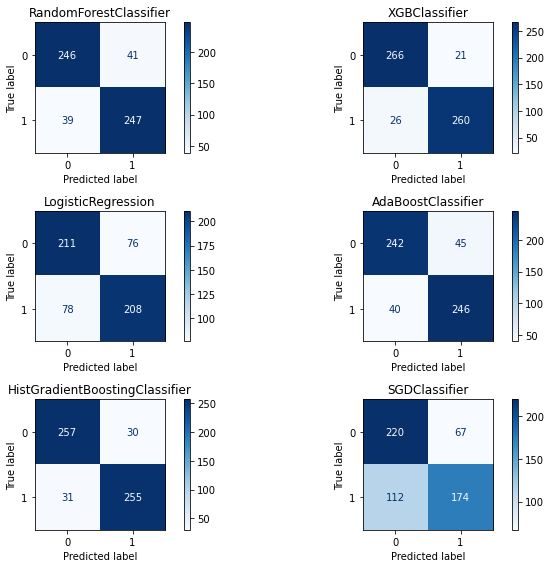

In [34]:
# plot consufion matrix on test set
classifiers = [rf,xgb,lr,ada,hist,sgd]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

In [35]:
# Classification reports
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_hist = hist.predict(X_test)
y_pred_ada = ada.predict(X_test)
y_pred_sgd = sgd.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("========================================================================")
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("========================================================================")
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("========================================================================")
print("Hist Gradient Boosting")
print(classification_report(y_test, y_pred_hist))
print("========================================================================")
print("Ada Boost")
print(classification_report(y_test, y_pred_ada))
print("========================================================================")
print("SGD")
print(classification_report(y_test, y_pred_sgd))
print("========================================================================")

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       287
           1       0.86      0.86      0.86       286

    accuracy                           0.86       573
   macro avg       0.86      0.86      0.86       573
weighted avg       0.86      0.86      0.86       573

XGBoost
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       287
           1       0.93      0.91      0.92       286

    accuracy                           0.92       573
   macro avg       0.92      0.92      0.92       573
weighted avg       0.92      0.92      0.92       573

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       287
           1       0.73      0.73      0.73       286

    accuracy                           0.73       573
   macro avg       0.73      0.73      0.73       573
weighted avg       0.73      0.7

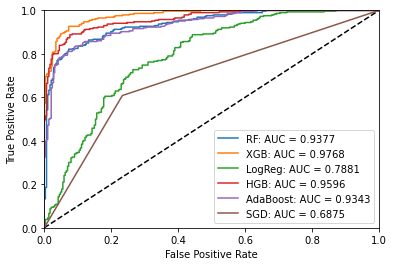

In [36]:
# ROC Curve
y_pred_prob1 = rf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc_rf = metrics.auc(fpr1, tpr1)

y_pred_prob2 = xgb.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc_xgb = metrics.auc(fpr2, tpr2)

y_pred_prob3 = lr.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc_lr = metrics.auc(fpr3, tpr3)

y_pred_prob4 = hist.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
roc_auc_hist = metrics.auc(fpr4, tpr4)

y_pred_prob5 = ada.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)
roc_auc_ada = metrics.auc(fpr5, tpr5)

y_pred_prob6 = sgd.predict_proba(X_test)[:,1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)
roc_auc_sgd = metrics.auc(fpr6, tpr6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'RF: AUC = %0.4f' % roc_auc_rf)
plt.plot(fpr2, tpr2, label = 'XGB: AUC = %0.4f' % roc_auc_xgb)
plt.plot(fpr3, tpr3, label = 'LogReg: AUC = %0.4f' % roc_auc_lr)
plt.plot(fpr4, tpr4, label = 'HGB: AUC = %0.4f' % roc_auc_hist)
plt.plot(fpr5, tpr5, label = 'AdaBoost: AUC = %0.4f' % roc_auc_ada)
plt.plot(fpr6, tpr6, label = 'SGD: AUC = %0.4f' % roc_auc_sgd)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

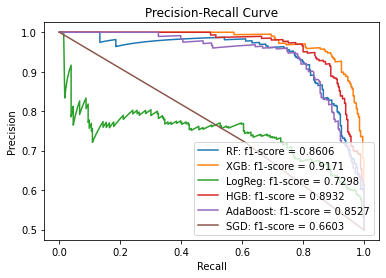

In [37]:
# Recall and Precision
y_score_rf = rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_score_rf)
y_pred_rf = rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)


y_score_xgb = xgb.predict_proba(X_test)[:,1]
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_score_xgb)
y_pred_xgb = xgb.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)

y_score_lr = lr.predict_proba(X_test)[:,1]
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_score_lr)
y_pred_lr = lr.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)

y_score_hist = hist.predict_proba(X_test)[:,1]
precision_hist, recall_hist, thresholds_hist = precision_recall_curve(y_test, y_score_hist)
y_pred_hist = hist.predict(X_test)
f1_hist = f1_score(y_test, y_pred_hist)

y_score_ada = ada.predict_proba(X_test)[:,1]
precision_ada, recall_ada, thresholds_ada = precision_recall_curve(y_test, y_score_ada)
y_pred_ada = ada.predict(X_test)
f1_ada = f1_score(y_test, y_pred_ada)

y_score_sgd = sgd.predict_proba(X_test)[:,1]
precision_sgd, recall_sgd, thresholds_sgd = precision_recall_curve(y_test, y_score_sgd)
y_pred_sgd = sgd.predict(X_test)
f1_sgd = f1_score(y_test, y_pred_sgd)

#precision-recall plot
fig, ax = plt.subplots()
ax.plot(recall_rf, precision_rf, label = 'RF: f1-score = %0.4f' % f1_rf)
ax.plot(recall_xgb, precision_xgb, label = 'XGB: f1-score = %0.4f' % f1_xgb)
ax.plot(recall_lr, precision_lr, label = 'LogReg: f1-score = %0.4f' % f1_lr)
ax.plot(recall_hist, precision_hist, label = 'HGB: f1-score = %0.4f' % f1_hist)
ax.plot(recall_ada, precision_ada, label = 'AdaBoost: f1-score = %0.4f' % f1_ada)
ax.plot(recall_sgd, precision_sgd, label = 'SGD: f1-score = %0.4f' % f1_sgd)
ax.legend(loc = 'lower right')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

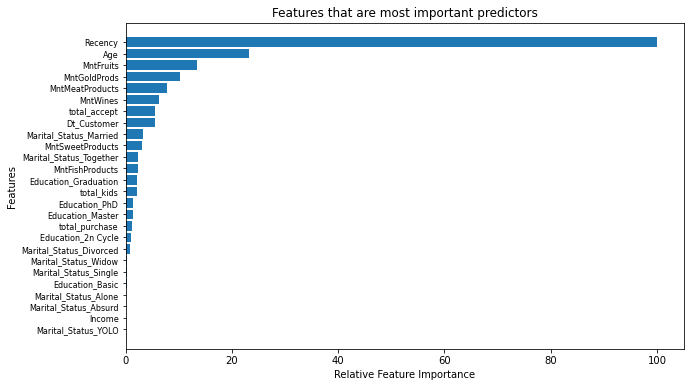

In [38]:
# Feature importance of the baseline model - Logistic Regression
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.ylabel('Features')
plt.title("Features that are most important predictors");

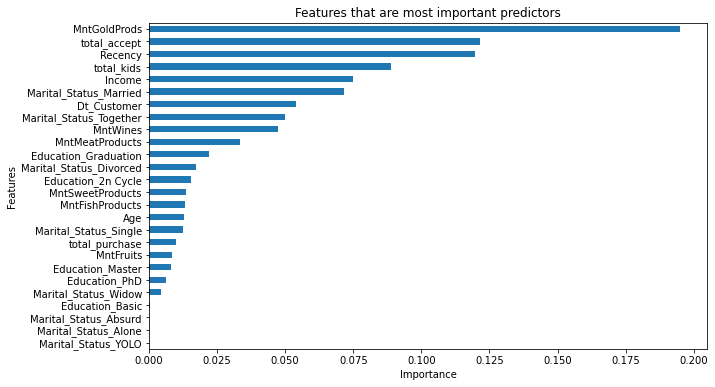

In [39]:
# Important features
# The feature importances in a random forest indicate the sum of the reduction in Gini Impurity 

plt.figure(figsize=(10,6))

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(40).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Features that are most important predictors")
plt.show()

In [74]:
# ----- Explain the model predictions on a dashboard using explainer dashboard
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

# use the training features and cust IDs as index
cust_ids = test_data['ID'].values
y_final = rf.predict(test_data[X_train.columns])

explainer = ClassifierExplainer(rf, test_data[X_train.columns], y_final, 
                                labels=['Not Purchase', 'Purchase'], 
                                idxs = cust_ids, 
                                index_name = "ID", 
                                target = "Response", 
                                )
db = ExplainerDashboard(explainer, 
                        title="Customer Purchase Propensity Explainer", 
                        shap_interaction=False,
                        )
db.run(port=8050)


# Explain multiple models - create multiple dashboards
#db1 = ExplainerDashboard(explainer1)
#db2 = ExplainerDashboard(explainer2)
#hub = ExplainerHub([db1, db2])
#hub.run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the ex

 * Running on all addresses.
 * Running on http://192.168.8.108:8050/ (Press CTRL+C to quit)
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET / HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET /_dash-layout HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.8.108 - - [04/Sep/2022 00:00:09] "POST /_dash-update-component HTTP/1.1" 200 -
1

In [45]:
test_data['Prob_Buy_rf'] = rf.predict_proba(test_data[X_train.columns])[:,1]
test_data['Prob_Buy_lr'] = lr.predict_proba(test_data[X_train.columns])[:,1]
test_data['Prob_Buy_xgb'] = xgb.predict_proba(test_data[X_train.columns])[:,1]
test_data['Prob_Buy_hist'] = hist.predict_proba(test_data[X_train.columns])[:,1]
test_data['Prob_Buy_ada'] = ada.predict_proba(test_data[X_train.columns])[:,1]
test_data['Prob_Buy_sgd'] = sgd.predict_proba(test_data[X_train.columns])[:,1]

test_data[['ID', 'Prob_Buy_rf', 'Prob_Buy_lr','Prob_Buy_xgb','Prob_Buy_hist','Prob_Buy_ada','Prob_Buy_sgd']].head()

,ID,Prob_Buy_rf,Prob_Buy_lr,Prob_Buy_xgb,Prob_Buy_hist,Prob_Buy_ada,Prob_Buy_sgd
3,6182.0,0.074137,0.134251,0.019490,0.081783,0.449595,0.0
5,7446.0,0.308724,0.568592,0.333842,0.398712,0.489567,0.0
6,965.0,0.348212,0.452799,0.115784,0.495861,0.500902,0.0
7,6177.0,0.367023,0.244245,0.060700,0.231521,0.483912,0.0
8,4855.0,0.073935,0.307735,0.017398,0.145015,0.466778,0.0


In [72]:
# Compare how models rank customers
test_data['rank_rf'] = pd.cut(test_data['Prob_Buy_rf'], 10, labels = np.arange(10,0,-1))
test_data['rank_lr'] = pd.cut(test_data['Prob_Buy_lr'], 10, labels = np.arange(10,0,-1))
test_data['rank_xgb'] = pd.cut(test_data['Prob_Buy_xgb'], 10, labels = np.arange(10,0,-1))
test_data['rank_hist'] = pd.cut(test_data['Prob_Buy_hist'], 10, labels = np.arange(10,0,-1))
test_data['rank_ada'] = pd.cut(test_data['Prob_Buy_ada'], 10, labels = np.arange(10,0,-1))
test_data['rank_sgd'] = pd.cut(test_data['Prob_Buy_sgd'], 10, labels = np.arange(10,0,-1))

test_data[['ID', 'Prob_Buy_rf', 'Prob_Buy_lr','Prob_Buy_xgb','Prob_Buy_hist','Prob_Buy_ada','Prob_Buy_sgd',
          'rank_rf','rank_lr','rank_xgb','rank_hist','rank_ada','rank_sgd']].head()

,ID,Prob_Buy_rf,Prob_Buy_lr,Prob_Buy_xgb,Prob_Buy_hist,Prob_Buy_ada,Prob_Buy_sgd,rank_rf,rank_lr,rank_xgb,rank_hist,rank_ada,rank_sgd
0,5524.0,0.546765,0.624505,0.356891,0.413133,0.502922,1.0,5,4,7,6,5,1
3,6182.0,0.179882,0.141571,0.051113,0.061483,0.453038,0.0,9,9,10,10,8,10
4,5324.0,0.081441,0.086821,0.015350,0.020626,0.442506,0.0,10,10,10,10,8,10
6,965.0,0.515639,0.448133,0.146932,0.493095,0.503385,0.0,5,6,9,6,4,10
7,6177.0,0.407197,0.296458,0.177855,0.471057,0.490525,0.0,6,8,9,6,5,10


LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

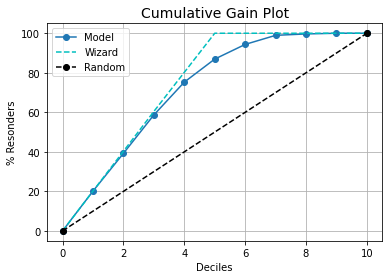

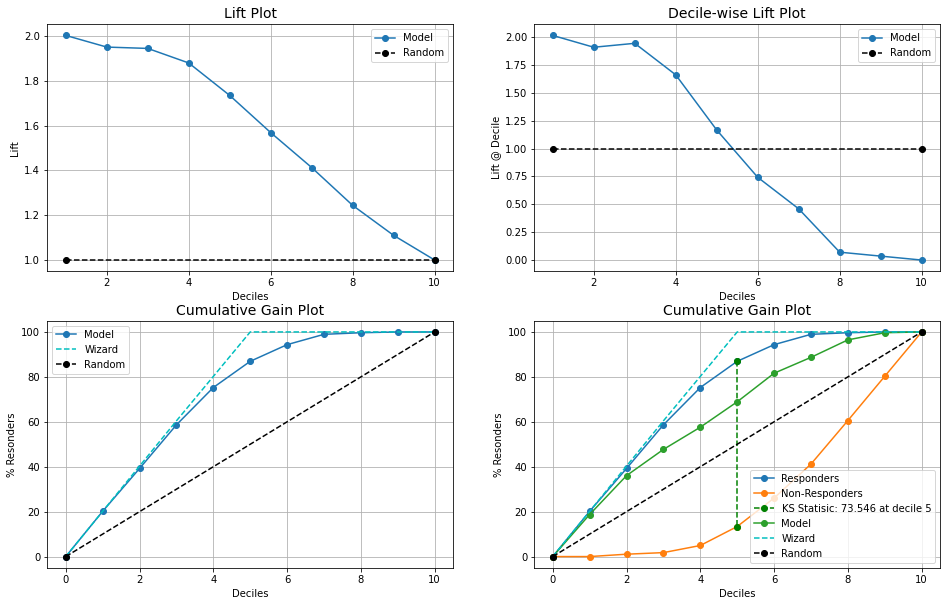

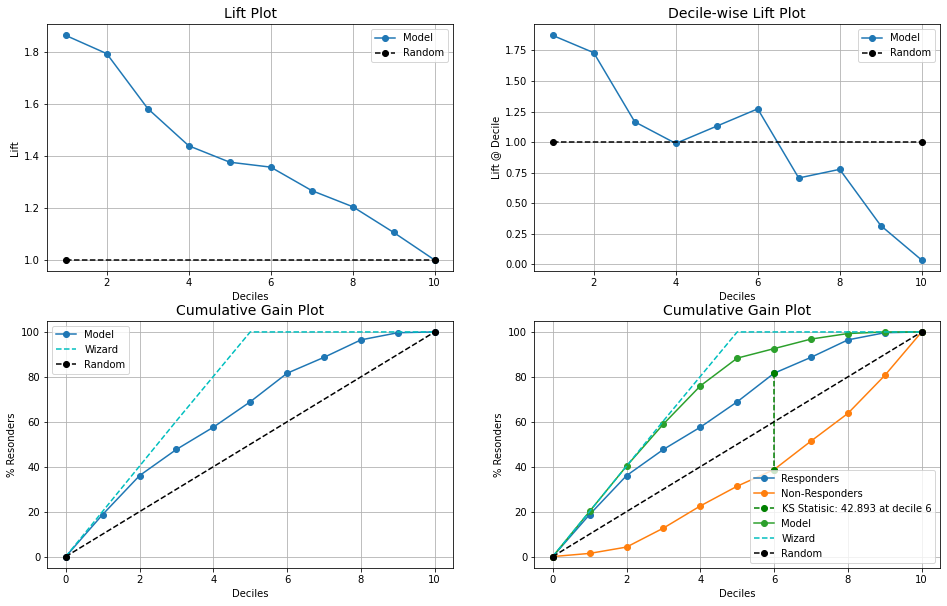

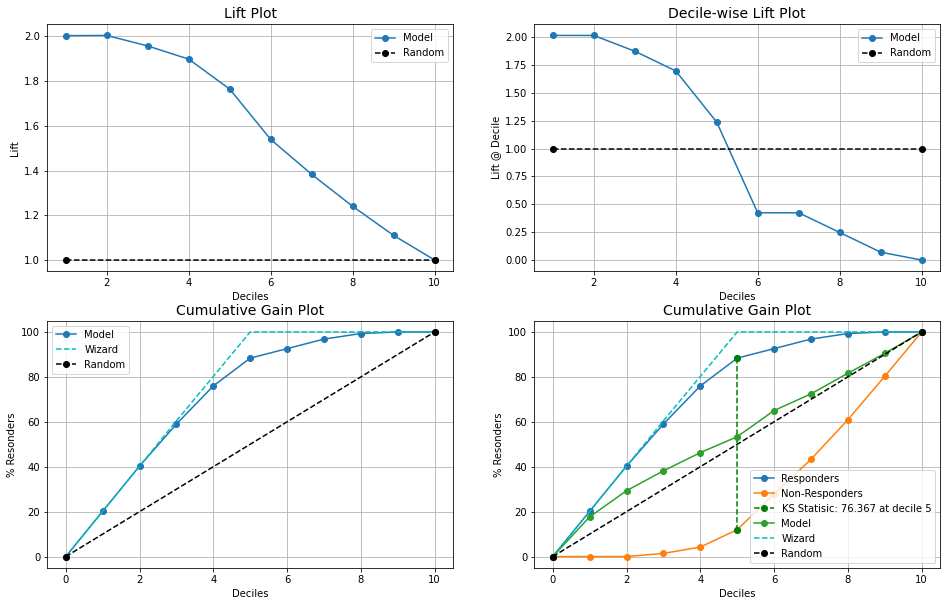

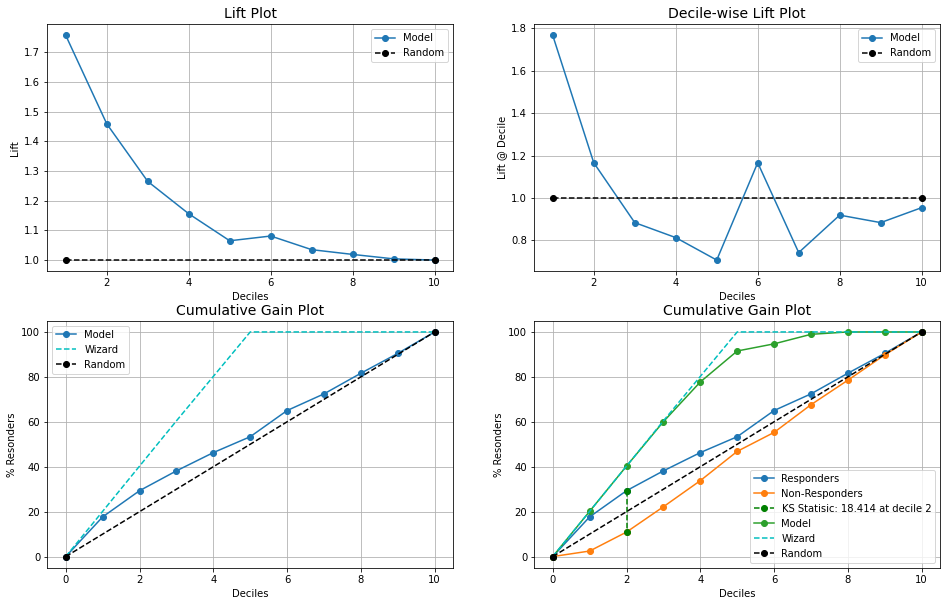

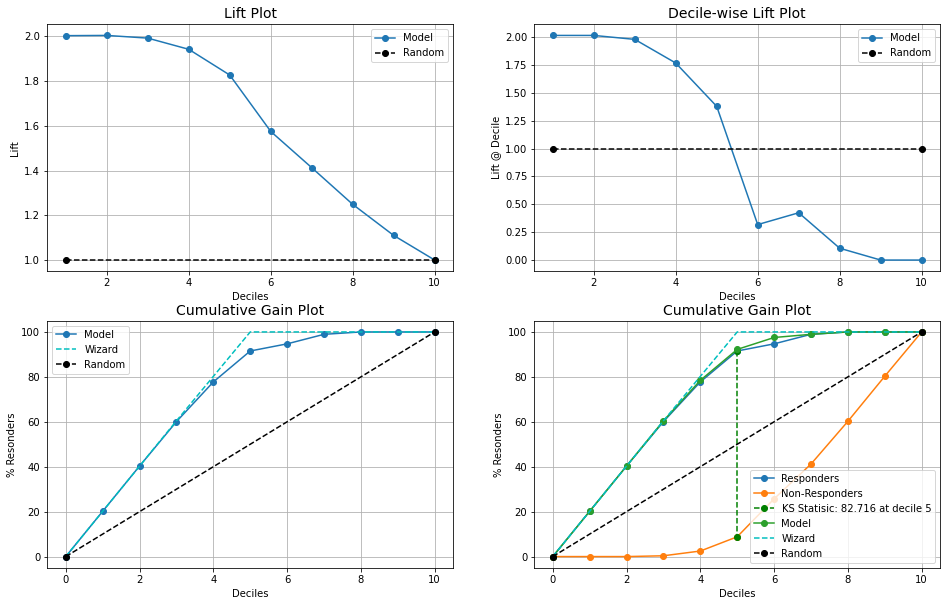

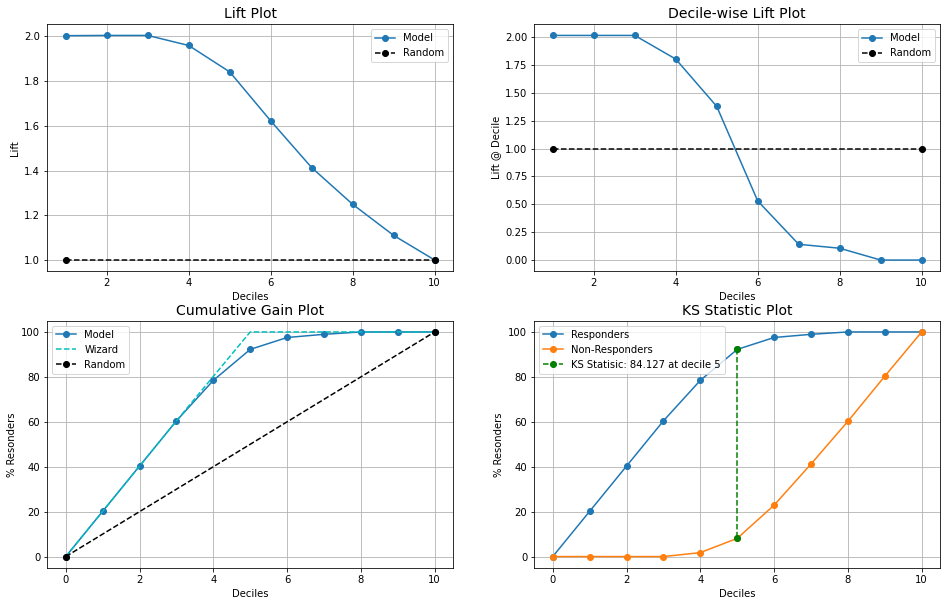

In [87]:
# Use kds (key-to-data science) Library to rank predicted probabilities
# and PLot Decile Table, Lift, Gain and KS Statistic charts

prob_rf = rf.predict_proba(X_test)
gains_plot_rf = kds.metrics.plot_cumulative_gain(y_test.to_numpy(), prob_rf[:,1])
ranks_rf = kds.metrics.report(y_test, prob_rf[:,1])


prob_logreg = lr.predict_proba(X_test)
gains_plot_logreg = kds.metrics.plot_cumulative_gain(y_test.to_numpy(), prob_logreg[:,1])
ranks_logreg = kds.metrics.report (y_test, prob_logreg[:,1])

prob_ada = ada.predict_proba(X_test)
gains_plot_ada = kds.metrics.plot_cumulative_gain(y_test.to_numpy(), prob_ada[:,1])
ranks_ada = kds.metrics.report(y_test, prob_ada[:, 1])

prob_sgd = sgd.predict_proba(X_test)
gains_plot_sgd = kds.metrics.plot_cumulative_gain(y_test.to_numpy(), prob_sgd[:,1])
ranks_sgd = kds.metrics.report(y_test, prob_sgd[:,1])

prob_hgb = hist.predict_proba(X_test)
gains_plot_hgb = kds.metrics.plot_cumulative_gain(y_test.to_numpy(), prob_hgb[:,1])
ranks_hgb = kds.metrics.report (y_test, prob_hgb[:,1])

prob_xgb = xgb.predict_proba(X_test)
gains_plot_xgb = kds.metrics. plot_cumulative_gain(y_test.to_numpy(), prob_xgb[:,1])
ranks_xgb = kds.metrics.report(y_test, prob_xgb[:,1])

Gains Chart - the gain chart shows a sharp increase above the reference line, then a flattening. In this case, approximately 40% of the data account for approximately 78% of the true positives. Based on the predictive model, if we target 40% of the total customers, 78% of those customers are likely to buy the product. If we selected customers at random (without a predictive model), we'd get only 40% responses (customer buying the product).

The lift chart is pretty much derived from the Gains chart. The x-axis remains the same (percentage of sample) but this time on the y-axis, instead of the Gains per se, we have the ratio of our model’s gains to the gains of a random model. As such, the y-axis informs us on how much better our model predicts than randomly guessing. For example, using the 10% of our best predictions (closer to 1), our model is about 2 times better than randomly selecting 10% from our customer pool. 

The Lift of 1.95 for top two deciles, means that when selecting top 20% of customers based on the predictive model, we can expect 1.95 times the total number of targets found by randomly selecting top 20% of customers without a model, or simply our model is about 1.95 times better than randomly selecting 20% from our customer pool.

The Greater the area between the Lift / Gain and Baseline, the Better the model.

In [89]:
# decile table of a random forest
ranks_rf.head(20)

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.905,0.934,0.921,57.0,57.0,0.0,28.3,57,100.000,57.0,57.0,57,0.0,10.053,20.141,20.141,0.000,20.141,2.003
1,2,0.861,0.903,0.886,57.0,54.0,3.0,28.3,57,94.737,114.0,111.0,114,3.0,20.106,39.223,40.283,1.056,38.167,1.951
2,3,0.777,0.860,0.826,57.0,55.0,2.0,28.3,57,96.491,171.0,166.0,171,5.0,30.159,58.657,60.424,1.761,56.896,1.945
3,4,0.643,0.774,0.707,56.0,47.0,9.0,28.3,56,83.929,227.0,213.0,227,14.0,40.035,75.265,80.212,4.930,70.335,1.880
4,5,0.497,0.641,0.564,57.0,33.0,24.0,28.3,56,57.895,284.0,246.0,283,38.0,50.088,86.926,100.000,13.380,73.546,1.735
5,6,0.357,0.495,0.424,57.0,21.0,36.0,28.3,0,36.842,341.0,267.0,283,74.0,60.141,94.346,100.000,26.056,68.290,1.569
6,7,0.250,0.356,0.298,56.0,13.0,43.0,28.3,0,23.214,397.0,280.0,283,117.0,70.018,98.940,100.000,41.197,57.743,1.413
7,8,0.192,0.250,0.220,57.0,2.0,55.0,28.3,0,3.509,454.0,282.0,283,172.0,80.071,99.647,100.000,60.563,39.084,1.244
8,9,0.113,0.192,0.147,57.0,1.0,56.0,28.3,0,1.754,511.0,283.0,283,228.0,90.123,100.000,100.000,80.282,19.718,1.110
9,10,0.072,0.112,0.092,56.0,0.0,56.0,28.3,0,0.000,567.0,283.0,283,284.0,100.000,100.000,100.000,100.000,0.000,1.000


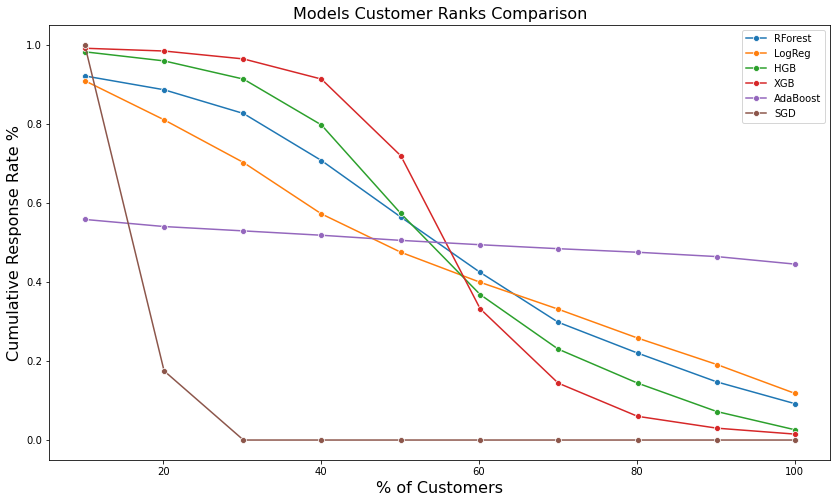

In [96]:
# compare model ranks from kds
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data = ranks_rf, x = "cum_cust_pct", y="prob_avg", label="RForest", ax=ax, marker="o", ci=None)
sns.lineplot(data = ranks_logreg, x = "cum_cust_pct", y="prob_avg", label="LogReg", ax=ax, marker="o", ci=None)
sns.lineplot(data = ranks_hgb, x = "cum_cust_pct", y="prob_avg", label="HGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = ranks_xgb, x = "cum_cust_pct", y="prob_avg", label="XGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = ranks_ada, x = "cum_cust_pct", y="prob_avg", label="AdaBoost", ax=ax, marker="o", ci=None)
sns.lineplot(data = ranks_sgd, x = "cum_cust_pct", y="prob_avg", label="SGD", ax=ax, marker="o", ci=None)        
plt.xlabel("% of Customers", fontsize=16)
plt.ylabel ("Cumulative Response Rate %" , fontsize=16)
plt.title ("Models Customer Ranks Comparison", fontsize=16)
plt.legend()
plt.show()

- The XGBoost ranks better than other models. It shows that if we target the top 40% of total customers, around 90% of those customers are most likely to buy the product

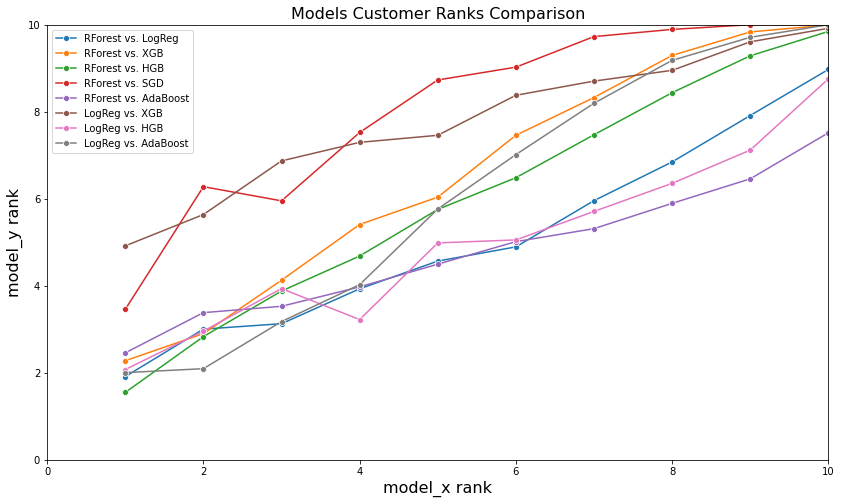

In [108]:
# compare model ranks from kds
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data = test_data, x = "rank_rf", y="rank_lr", label="RForest vs. LogReg", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_rf", y="rank_xgb", label="RForest vs. XGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_rf", y="rank_hist", label="RForest vs. HGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_rf", y="rank_sgd", label="RForest vs. SGD", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_rf", y="rank_ada", label="RForest vs. AdaBoost", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_lr", y="rank_xgb", label="LogReg vs. XGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_hist", y="rank_lr", label="LogReg vs. HGB", ax=ax, marker="o", ci=None)
sns.lineplot(data = test_data, x = "rank_ada", y="rank_lr", label="LogReg vs. AdaBoost", ax=ax, marker="o", ci=None)
ax.set_xlabel("model_x rank", fontsize=16)
ax.set_ylabel("model_y rank" , fontsize=16)
ax.set_title("Models Customer Ranks Comparison", fontsize=16)
ax.legend
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [109]:
test_data[['ID', 'Prob_Buy_rf', 'Prob_Buy_lr','Prob_Buy_xgb','Prob_Buy_hist','Prob_Buy_ada','Prob_Buy_sgd',
          'rank_rf','rank_lr','rank_xgb','rank_hist','rank_ada','rank_sgd']].head()

,ID,Prob_Buy_rf,Prob_Buy_lr,Prob_Buy_xgb,Prob_Buy_hist,Prob_Buy_ada,Prob_Buy_sgd,rank_rf,rank_lr,rank_xgb,rank_hist,rank_ada,rank_sgd
0,5524.0,0.546765,0.624505,0.356891,0.413133,0.502922,1.0,5,4,7,6,5,1
3,6182.0,0.179882,0.141571,0.051113,0.061483,0.453038,0.0,9,9,10,10,8,10
4,5324.0,0.081441,0.086821,0.015350,0.020626,0.442506,0.0,10,10,10,10,8,10
6,965.0,0.515639,0.448133,0.146932,0.493095,0.503385,0.0,5,6,9,6,4,10
7,6177.0,0.407197,0.296458,0.177855,0.471057,0.490525,0.0,6,8,9,6,5,10


- There is some diversity in the way the models rank customers according to their propensity to buy the product, even though majority of the models rank customers the same way. Rank-1-having the highest propensity to buy while Rank-10 is the lowest propensity to buy.

- e.g for customer 6182, they're ranked at number 9 by RF and LogReg but ranked at 10 by XGB, HGB and SGD and 8 by AdaBoost

In [116]:
# combine model predictions and ranks and take one prediction/rank
test_data_combined = test_data

test_data_combined['rank_rf'] = test_data_combined['rank_rf'].astype(int)
test_data_combined['rank_lr'] = test_data_combined['rank_lr'].astype(int)
test_data_combined['rank_xgb'] = test_data_combined['rank_xgb'].astype(int)
test_data_combined['rank_hist'] = test_data_combined['rank_hist'].astype(int)
test_data_combined['rank_ada'] = test_data_combined['rank_ada'].astype(int)
test_data_combined['rank_sgd'] = test_data_combined['rank_sgd'].astype(int)

test_data_combined['prob_to_buy_final'] = (test_data_combined['Prob_Buy_rf']+test_data_combined['Prob_Buy_lr']+test_data_combined['Prob_Buy_xgb']+test_data_combined['Prob_Buy_hist']+test_data_combined['Prob_Buy_ada'])/5
test_data_combined['rank_final'] = (test_data_combined['rank_rf']+test_data_combined['rank_lr']+test_data_combined['rank_xgb']+test_data_combined['rank_hist']+test_data_combined['rank_ada'])/5

#test_data_combined[['ID','prob_to_buy_final','rank_final']].head()
test_data_combined[['ID','prob_to_buy_final','rank_final']].sort_values(by="prob_to_buy_final", ascending=False).head()

,ID,prob_to_buy_final,rank_final
1961,3009.0,0.867703,1.0
1084,6072.0,0.858783,1.2
820,9493.0,0.856328,1.0
990,8545.0,0.835422,1.2
77,7503.0,0.826193,1.6
